In [1]:
import networkx as nx
import numpy as np
import pickle
from parser import *
import os
import matplotlib.pyplot as plt

In [2]:
MERAs_fn = "MERAs_64_disorder.p"
data_dir = "../data/L_64_energy_avg/"
W_list = range(11)
num_files = 100

In [3]:
def load_MERAs(W_list, data_dir, MERAs_fn, num_files):
    if os.path.isfile(MERAs_fn):
        MERAs = pickle.load(open(MERAs_fn, 'rb'))
    else:
        MERAs = {}
        for W in W_list:
            d = "{}W_{}/".format(data_dir, W)
            MERAs[W] = [MERA("{}W_{}_{:02}.txt".format(d, W, i)) for i in range(num_files)]
        pickle.dump(MERAs, open(MERAs_fn, 'wb'))
    return MERAs

In [4]:
MERAs = load_MERAs(W_list, data_dir, MERAs_fn, num_files)

In [5]:
cut_list = [np.mean([MERAs[W][i].get_mean_cut_number() for i in range(num_files)]) for W in W_list]
cut_list_std = [np.std([MERAs[W][i].get_mean_cut_number() for i in range(num_files)]) for W in W_list]

depth_list = [np.mean([MERAs[W][i].depth for i in range(num_files)]) for W in W_list]
depth_list_std = [np.std([MERAs[W][i].depth for i in range(num_files)]) for W in W_list]

bal_list = [np.mean([MERAs[W][i].get_balance_metric() for i in range(num_files)]) for W in W_list]
bal_list_std = [np.std([MERAs[W][i].get_balance_metric() for i in range(num_files)]) for W in W_list]

<IPython.core.display.Javascript object>


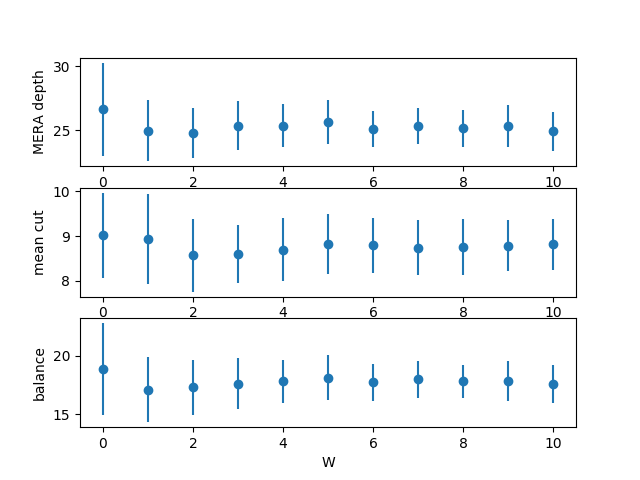

In [6]:
%matplotlib notebook
W_list = range(11)
plt.subplot(311)
plt.scatter(W_list, depth_list)
plt.errorbar(W_list, depth_list, depth_list_std, linestyle='None', marker=".")
plt.xlabel("W")
plt.ylabel("MERA depth")

plt.subplot(312)
plt.scatter(W_list, cut_list)
plt.errorbar(W_list, cut_list, cut_list_std, linestyle='None', marker=".")
plt.xlabel("W")
plt.ylabel("mean cut")

plt.subplot(313)
plt.scatter(W_list, bal_list)
plt.errorbar(W_list, bal_list, bal_list_std, linestyle='None', marker=".")
plt.xlabel("W")
plt.ylabel("balance")
plt.show()

In [7]:
adl = [sum([ np.array(MERAs[W][i].get_avg_dist_depth_list()) for i in range(num_files)])/num_files for W in W_list]

<IPython.core.display.Javascript object>


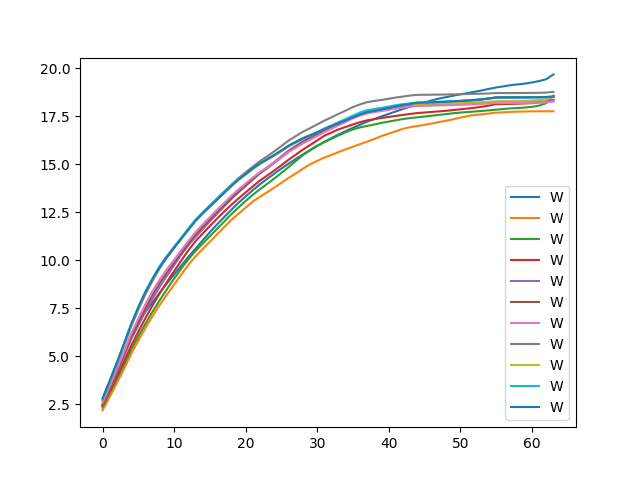

In [10]:
%matplotlib notebook
for i, W in enumerate(W_list):
    plt.plot(range(64), adl[i], label="W")
plt.legend(loc='best')
plt.show()